In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns

In [3]:
# File to Load (Downloaded csv file from Hockey Reference website)
file_to_load = "Data/PlayOffs_2018_2019.csv"

# Read Hockey Reference Playoff File and store into Pandas data frame
playoff_data1819 = pd.read_csv(file_to_load)

In [4]:
playoff_data1819

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI
0,Ryan O'Reilly,27,C,26,8,15,23,2,4,7,1,0,2,11,4,0,54,14.8,546,21:00
1,Jaden Schwartz,26,C,26,12,8,20,9,2,10,2,0,2,8,0,0,63,19.0,454,17:28
2,Alex Pietrangelo,29,D,26,3,16,19,5,12,3,0,0,1,12,4,0,77,3.9,669,25:45:00
3,Vladimir Tarasenko,27,RW,26,11,6,17,-5,4,6,5,0,2,4,2,0,90,12.2,476,18:19
4,David Perron,30,LW,26,7,9,16,4,16,5,2,0,2,7,2,0,58,12.1,473,18:12
5,Tyler Bozak,32,C,26,5,8,13,-2,8,4,1,0,2,6,2,0,33,15.2,367,14:08
6,Brayden Schenn,27,C,26,5,7,12,-2,14,4,1,0,0,5,2,0,57,8.8,487,18:43
7,Colton Parayko,25,D,26,2,10,12,6,10,1,1,0,0,8,2,0,59,3.4,653,25:07:00
8,Oskar Sundqvist,24,C,25,4,5,9,5,8,4,0,0,1,5,0,0,44,9.1,404,16:08
9,Vince Dunn,22,D,20,2,6,8,-5,8,2,0,0,0,3,3,0,31,6.5,303,15:10


In [24]:
type(playoff_data1819)

pandas.core.frame.DataFrame

In [6]:
# File to Load (Remember to Change These)
file_to_load = "Data/game_plays.csv"

# Read large File with all data for games played for hockey season 2018-2019 and store into Pandas data frame
df_data1819 = pd.read_csv(file_to_load)

In [ ]:
# df_data1819

In [14]:
# From this large dataset, need to pull data for Gm 7 of the Stanley Cup Finals
# To get game_id, the first 4 digits identify the season of the game (ie. 2018 for the 2018-2019 season). 
# The next 2 digits give the type of game, where 01 = preseason, 02 = regular season, 03 = playoffs, 04 = all-star. 
# The final 4 digits identify the specific game number. 
# For regular season and preseason games, this ranges from 0001 to the number of games played. (1271 for seasons with 31 teams (2017 and onwards) and 1230 for seasons with 30 teams). 
# For playoff games, the 2nd digit of the specific number gives the round of the playoffs, the 3rd digit specifies the matchup, and the 4th digit specifies the game (out of 7).
gm_6 = []
# gm_7 = []

gm_6 = df_data1819[df_data1819.game_id == 2018030416]
# gm_7 = df_data1819[df_data1819.game_id == 2018030417]

In [15]:
gm_6
# gm_7
# Need to remove rows where event == Game Scheduled, Period Ready, Period Start, Period Official, and Game End

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
3629934,2018030416_1,2018030416,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-09 20:51:57,0,0,Game Scheduled,NaN,NaN,NaN
3629935,2018030416_2,2018030416,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-10 00:18:26,0,0,Period Ready,NaN,NaN,NaN
3629936,2018030416_3,2018030416,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-10 00:20:52,0,0,Period Start,NaN,NaN,NaN
3629937,2018030416_4,2018030416,4,19.0,6.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2019-06-10 00:20:52,0,0,Ryan O'Reilly faceoff won against Sean Kuraly,0.0,0.0,left
3629938,2018030416_5,2018030416,5,6.0,19.0,Missed Shot,NaN,-64.0,3.0,1,REGULAR,16,1184,2019-06-10 00:22:01,0,0,Noel Acciari - Wide of Net,64.0,-3.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630265,2018030416_332,2018030416,332,6.0,19.0,Missed Shot,NaN,8.0,-3.0,3,REGULAR,1199,1,2019-06-10 02:57:06,5,1,Connor Clifton - Wide of Net,-8.0,3.0,right
3630266,2018030416_333,2018030416,333,NaN,NaN,Period End,NaN,NaN,NaN,3,REGULAR,1200,0,2019-06-10 02:57:12,5,1,End of 3rd Period,NaN,NaN,NaN
3630267,2018030416_334,2018030416,334,NaN,NaN,Period Official,NaN,NaN,NaN,3,REGULAR,1200,0,2019-06-10 02:57:14,5,1,Period Official,NaN,NaN,NaN
3630268,2018030416_335,2018030416,335,NaN,NaN,Game End,NaN,NaN,NaN,3,REGULAR,1200,0,2019-06-10 02:57:15,5,1,Game End,NaN,NaN,NaN


In [36]:
# Need to remove rows where event == Game Scheduled, Period Ready, Period Start, Period Official, and Game End
# index_name1 = gm_7[ gm_7['event'] == 'Game Scheduled' ].index
# index_name1 = gm_7[ gm_7['event'] == 'Period Ready' ].index
# index_name1 = gm_7[ gm_7['event'] == 'Period Start' ].index
# index_name1 = gm_7[ gm_7['event'] == 'Period Official' ].index
# index_name1 = gm_7[ gm_7['event'] == 'Game End' ].index

In [16]:
# Need to remove rows where event == Game Scheduled, Period Ready, Period Start, Period Official, and Game End
# index_name1 = gm_6[ gm_6['event'] == 'Game Scheduled' ].index
# index_name1 = gm_6[ gm_6['event'] == 'Period Ready' ].index
# index_name1 = gm_6[ gm_6['event'] == 'Period Start' ].index
# index_name1 = gm_6[ gm_6['event'] == 'Period Official' ].index
# index_name1 = gm_6[ gm_6['event'] == 'Game End' ].index

In [10]:
# gm_7.drop(index_name1, inplace = True)
# gm_7

In [17]:
# gm_7.to_csv("Gm7_data_clean.csv", index=True, header=True)
gm_6.to_csv("Gm6_data_clean.csv", index=True, header=True)

In [9]:
# File to Load (loading clean data without index change)
file_to_load = "Gm7_data_clean.csv"

# Read and store into Pandas data frame
gm_7 = pd.read_csv(file_to_load)

In [18]:
gm_7.head()
gm_6.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
3629934,2018030416_1,2018030416,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-09 20:51:57,0,0,Game Scheduled,NaN,NaN,NaN
3629935,2018030416_2,2018030416,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-10 00:18:26,0,0,Period Ready,NaN,NaN,NaN
3629936,2018030416_3,2018030416,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-10 00:20:52,0,0,Period Start,NaN,NaN,NaN
3629937,2018030416_4,2018030416,4,19.0,6.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2019-06-10 00:20:52,0,0,Ryan O'Reilly faceoff won against Sean Kuraly,0.0,0.0,left
3629938,2018030416_5,2018030416,5,6.0,19.0,Missed Shot,NaN,-64.0,3.0,1,REGULAR,16,1184,2019-06-10 00:22:01,0,0,Noel Acciari - Wide of Net,64.0,-3.0,right


In [13]:
first_period_shots = gm_7.loc[((gm_7['event'] == 'Shot') | (gm_7['event'] == 'Goal')) & (gm_7['period'] == 1)]
first_period_shots

,Unnamed: 0,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,...,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
4,3630277,2018030417_8,2018030417,8,19.0,6.0,Shot,Wrist Shot,-69.0,20.0,...,REGULAR,27,1173,2019-06-13 00:22:23,0,0,Jaden Schwartz Wrist Shot saved by Tuukka Rask,69.0,-20.0,right
15,3630288,2018030417_19,2018030417,19,6.0,19.0,Shot,Wrist Shot,54.0,30.0,...,REGULAR,220,980,2019-06-13 00:25:57,0,0,John Moore Wrist Shot saved by Jordan Binnington,54.0,30.0,left
18,3630291,2018030417_22,2018030417,22,6.0,19.0,Shot,Wrist Shot,40.0,-28.0,...,REGULAR,229,971,2019-06-13 00:26:41,0,0,Torey Krug Wrist Shot saved by Jordan Binnington,40.0,-28.0,left
28,3630301,2018030417_32,2018030417,32,6.0,19.0,Shot,Backhand,71.0,-23.0,...,REGULAR,392,808,2019-06-13 00:29:43,0,0,Sean Kuraly Backhand saved by Jordan Binnington,71.0,-23.0,left
41,3630314,2018030417_45,2018030417,45,6.0,19.0,Shot,Wrist Shot,55.0,6.0,...,REGULAR,532,668,2019-06-13 00:35:43,0,0,Brad Marchand Wrist Shot saved by Jordan Binni...,55.0,6.0,left
46,3630319,2018030417_50,2018030417,50,6.0,19.0,Shot,Wrist Shot,67.0,3.0,...,REGULAR,557,643,2019-06-13 00:36:35,0,0,Patrice Bergeron Wrist Shot saved by Jordan Bi...,67.0,3.0,left
48,3630321,2018030417_52,2018030417,52,6.0,19.0,Shot,Backhand,78.0,1.0,...,REGULAR,589,611,2019-06-13 00:37:08,0,0,David Krejci Backhand saved by Jordan Binnington,78.0,1.0,left
57,3630330,2018030417_61,2018030417,61,6.0,19.0,Shot,Backhand,79.0,-5.0,...,REGULAR,696,504,2019-06-13 00:41:51,0,0,Marcus Johansson Backhand saved by Jordan Binn...,79.0,-5.0,left
76,3630349,2018030417_80,2018030417,80,19.0,6.0,Shot,Wrist Shot,-89.0,-21.0,...,REGULAR,1000,200,2019-06-13 00:48:10,0,0,Sammy Blais Wrist Shot saved by Tuukka Rask,89.0,21.0,right
77,3630350,2018030417_81,2018030417,81,19.0,6.0,Goal,Tip-In,-71.0,-3.0,...,REGULAR,1007,193,2019-06-13 00:48:17,1,0,"Ryan O'Reilly (8) Tip-In, assists: Jay Bouwmee...",71.0,3.0,right


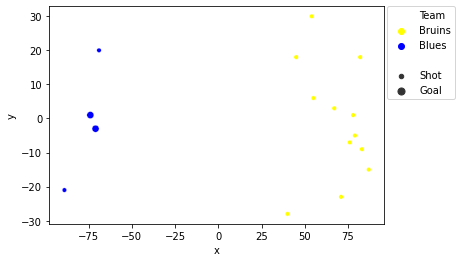

In [66]:
from matplotlib.lines import Line2D
import seaborn as sns
# custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
#           Line2D([], [], marker='.', color='y', linestyle='None')]

p1 =sns.scatterplot(x="x", y="y",
              hue="team_id_for", palette=['yellow','blue'],
              size = "event", sizes = (50,20), size_order=['Shot','Goal'],
              legend = 'full',
              data=first_period_shots);

leg = plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
new_labels = ['Team', 'Bruins', 'Blues', '']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

In [ ]:
# want to see if I can make dimensions equal hockey rink, some way to mark goal and put center ice/blue lines on grid

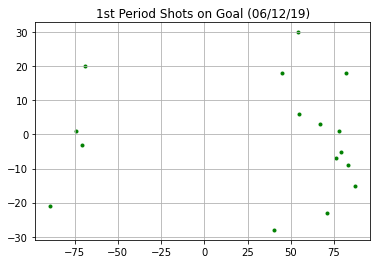

In [82]:
fig, ax = plt.subplots()
ax.scatter(first_period_shots["x"], first_period_shots["y"], marker = '.', linestyle="None", color='g')
# ax.set_xlabel("x")
# ax.set_ylabel("y")
ax.set_title("1st Period Shots on Goal (06/12/19)")
ax.grid(True)
# plt.savefig('xxx.png')
plt.show()

In [68]:
second_period_shots = gm_7.loc[((gm_7['event'] == 'Shot') | (gm_7['event'] == 'Goal')) & (gm_7['period'] == 2)]
second_period_shots

,Unnamed: 0,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,...,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
109,3630386,2018030417_117,2018030417,117,6.0,19.0,Shot,Wrist Shot,-74.0,-30.0,...,REGULAR,87,1113,2019-06-13 01:16:38,2,0,John Moore Wrist Shot saved by Jordan Binnington,74.0,30.0,right
112,3630389,2018030417_120,2018030417,120,6.0,19.0,Shot,Backhand,-73.0,32.0,...,REGULAR,142,1058,2019-06-13 01:17:32,2,0,Sean Kuraly Backhand saved by Jordan Binnington,73.0,-32.0,right
116,3630393,2018030417_124,2018030417,124,6.0,19.0,Shot,Backhand,-86.0,-16.0,...,REGULAR,238,962,2019-06-13 01:19:42,2,0,David Pastrnak Backhand saved by Jordan Binnin...,86.0,16.0,right
121,3630398,2018030417_129,2018030417,129,19.0,6.0,Shot,Wrist Shot,55.0,20.0,...,REGULAR,308,892,2019-06-13 01:21:26,2,0,Sammy Blais Wrist Shot saved by Tuukka Rask,55.0,20.0,left
132,3630409,2018030417_140,2018030417,140,19.0,6.0,Shot,Wrist Shot,34.0,-19.0,...,REGULAR,370,830,2019-06-13 01:24:14,2,0,Alex Pietrangelo Wrist Shot saved by Tuukka Rask,34.0,-19.0,left
151,3630428,2018030417_159,2018030417,159,19.0,6.0,Shot,Tip-In,80.0,0.0,...,REGULAR,606,594,2019-06-13 01:32:12,2,0,Brayden Schenn Tip-In saved by Tuukka Rask,80.0,0.0,left
155,3630432,2018030417_163,2018030417,163,19.0,6.0,Shot,Wrist Shot,41.0,-22.0,...,REGULAR,649,551,2019-06-13 01:32:55,2,0,Zach Sanford Wrist Shot saved by Tuukka Rask,41.0,-22.0,left
161,3630438,2018030417_169,2018030417,169,6.0,19.0,Shot,Snap Shot,-76.0,-25.0,...,REGULAR,752,448,2019-06-13 01:34:38,2,0,Jake DeBrusk Snap Shot saved by Jordan Binnington,76.0,25.0,right
162,3630439,2018030417_170,2018030417,170,6.0,19.0,Shot,Wrist Shot,3.0,29.0,...,REGULAR,782,418,2019-06-13 01:35:08,2,0,Matt Grzelcyk Wrist Shot saved by Jordan Binni...,-3.0,-29.0,right
165,3630442,2018030417_173,2018030417,173,6.0,19.0,Shot,Wrist Shot,82.0,35.0,...,REGULAR,818,382,2019-06-13 01:35:49,2,0,Brandon Carlo Wrist Shot saved by Jordan Binni...,-82.0,-35.0,right


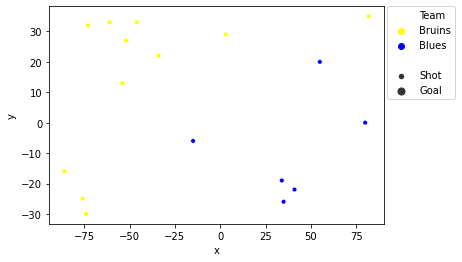

In [73]:
p2 =sns.scatterplot(x="x", y="y",
              hue="team_id_for", palette=['yellow','blue'],
              size = "event", sizes = (50,20), size_order=['Shot','Goal'],
              legend = 'full',
              data=second_period_shots);

leg = plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
new_labels = ['Team', 'Bruins', 'Blues', '']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

In [70]:
third_period_shots = gm_7.loc[((gm_7['event'] == 'Shot') | (gm_7['event'] == 'Goal')) & (gm_7['period'] == 3)]
third_period_shots

,Unnamed: 0,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,...,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
204,3630485,2018030417_216,2018030417,216,6.0,19.0,Shot,Slap Shot,38.0,-1.0,...,REGULAR,66,1134,2019-06-13 02:09:14,2,0,Torey Krug Slap Shot saved by Jordan Binnington,38.0,-1.0,left
214,3630495,2018030417_226,2018030417,226,19.0,6.0,Shot,Wrist Shot,-55.0,-2.0,...,REGULAR,186,1014,2019-06-13 02:11:46,2,0,Oskar Sundqvist Wrist Shot saved by Tuukka Rask,55.0,2.0,right
215,3630496,2018030417_227,2018030417,227,19.0,6.0,Shot,Wrist Shot,-79.0,1.0,...,REGULAR,190,1010,2019-06-13 02:11:49,2,0,Oskar Sundqvist Wrist Shot saved by Tuukka Rask,79.0,-1.0,right
216,3630497,2018030417_228,2018030417,228,19.0,6.0,Shot,Wrist Shot,-84.0,-6.0,...,REGULAR,193,1007,2019-06-13 02:12:33,2,0,Ivan Barbashev Wrist Shot saved by Tuukka Rask,84.0,6.0,right
218,3630499,2018030417_230,2018030417,230,19.0,6.0,Shot,Wrist Shot,-82.0,-12.0,...,REGULAR,209,991,2019-06-13 02:12:08,2,0,Vladimir Tarasenko Wrist Shot saved by Tuukka ...,82.0,12.0,right
224,3630505,2018030417_236,2018030417,236,6.0,19.0,Shot,Backhand,78.0,-4.0,...,REGULAR,308,892,2019-06-13 02:13:47,2,0,Sean Kuraly Backhand saved by Jordan Binnington,78.0,-4.0,left
226,3630507,2018030417_238,2018030417,238,19.0,6.0,Shot,Wrist Shot,-32.0,18.0,...,REGULAR,328,872,2019-06-13 02:15:00,2,0,Colton Parayko Wrist Shot saved by Tuukka Rask,32.0,-18.0,right
229,3630510,2018030417_241,2018030417,241,6.0,19.0,Shot,Wrist Shot,80.0,19.0,...,REGULAR,360,840,2019-06-13 02:15:13,2,0,Brad Marchand Wrist Shot saved by Jordan Binni...,80.0,19.0,left
238,3630519,2018030417_250,2018030417,250,6.0,19.0,Shot,Wrist Shot,42.0,-27.0,...,REGULAR,534,666,2019-06-13 02:19:19,2,0,Noel Acciari Wrist Shot saved by Jordan Binnin...,42.0,-27.0,left
239,3630520,2018030417_251,2018030417,251,6.0,19.0,Shot,Wrist Shot,77.0,8.0,...,REGULAR,537,663,2019-06-13 02:19:22,2,0,Joakim Nordstrom Wrist Shot saved by Jordan Bi...,77.0,8.0,left


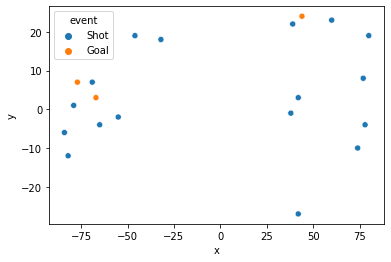

In [93]:
p3 =sns.scatterplot(x="x", y="y",
              hue="event",
              data=third_period_shots);

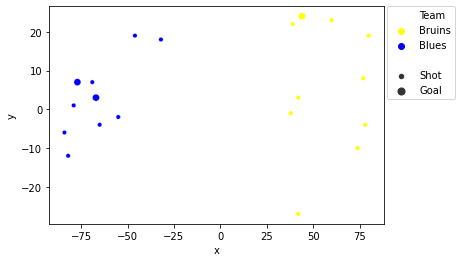

In [71]:
p3 =sns.scatterplot(x="x", y="y",
              hue="team_id_for", palette=['yellow','blue'],
              size = "event", sizes = (50,20), size_order=['Shot','Goal'],
              legend = 'full',
              data=third_period_shots);

leg = plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
new_labels = ['Team', 'Bruins', 'Blues', '']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

In [72]:
gm_6.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
3629934,2018030416_1,2018030416,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-09 20:51:57,0,0,Game Scheduled,NaN,NaN,NaN
3629935,2018030416_2,2018030416,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-10 00:18:26,0,0,Period Ready,NaN,NaN,NaN
3629936,2018030416_3,2018030416,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2019-06-10 00:20:52,0,0,Period Start,NaN,NaN,NaN
3629937,2018030416_4,2018030416,4,19.0,6.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2019-06-10 00:20:52,0,0,Ryan O'Reilly faceoff won against Sean Kuraly,0.0,0.0,left
3629938,2018030416_5,2018030416,5,6.0,19.0,Missed Shot,NaN,-64.0,3.0,1,REGULAR,16,1184,2019-06-10 00:22:01,0,0,Noel Acciari - Wide of Net,64.0,-3.0,right


In [75]:
# File to Load (Downloaded csv file from Hockey Reference website)
file_to_load = "Data/game_skater_stats.csv"

# Read Hockey Reference Playoff File and store into Pandas data frame
df_skater_stats = pd.read_csv(file_to_load)

In [76]:
# From this large dataset, need to pull data for Gm 7 of the Stanley Cup Finals
# To get game_id, the first 4 digits identify the season of the game (ie. 2018 for the 2018-2019 season). 
# The next 2 digits give the type of game, where 01 = preseason, 02 = regular season, 03 = playoffs, 04 = all-star. 
# The final 4 digits identify the specific game number. 
# For regular season and preseason games, this ranges from 0001 to the number of games played. (1271 for seasons with 31 teams (2017 and onwards) and 1230 for seasons with 30 teams). 
# For playoff games, the 2nd digit of the specific number gives the round of the playoffs, the 3rd digit specifies the matchup, and the 4th digit specifies the game (out of 7).
gm_6_skater_stats = []
# gm_7_skater_stats = []

gm_6_skater_stats = df_skater_stats[df_skater_stats.game_id == 2018030416]
# gm_7_skater_stats = df_data1819[df_data1819.game_id == 2018030417]

In [96]:
gm_6_skater_stats.to_csv("Gm6_skater_stats.csv",index=True, header=True)

In [81]:
# File to Load (Downloaded csv file from Hockey Reference website)
file_to_load = "Gm6_skater_stats.csv"

# Read Hockey Reference Playoff File and store into Pandas data frame
gm_6_skater_stats = pd.read_csv(file_to_load)

In [93]:
gm_6_skater_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2018030416,8473419,6,947,1,1,1,0,1,0,...,1,1,0,0,0,0,1,624,193,130
1,2018030416,8471276,6,906,1,0,2,1,0,0,...,12,0,0,0,0,2,2,831,2,73
2,2018030416,8478569,6,911,0,0,3,3,0,0,...,0,1,0,0,0,2,0,801,88,22
3,2018030416,8477956,6,806,1,1,4,2,0,1,...,0,1,0,0,0,1,0,676,0,130
4,2018030416,8479325,6,1522,0,0,1,5,0,0,...,0,1,0,0,0,0,0,1326,144,52


In [83]:
type(gm_6_skater_stats)

pandas.core.frame.DataFrame

In [92]:
gm_6_skater_stats.drop(['Unnamed: 0'], axis=1, inplace=True)